In [1]:
import csv
import random
from collections import Counter
from matplotlib import pyplot as plt

# We will use numpy. numpy is not compatible with jprint.   
def jprint(data):
    print(json.dumps(data, indent=4)) 
    
data=[]
with open('wine_data.csv', encoding="utf-8") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        row["acidity"]=float(row["acidity"])
        row["chlorides"]=float(row["chlorides"])
        row["sulphates"]=float(row["sulphates"])
        data.append(row)
# data

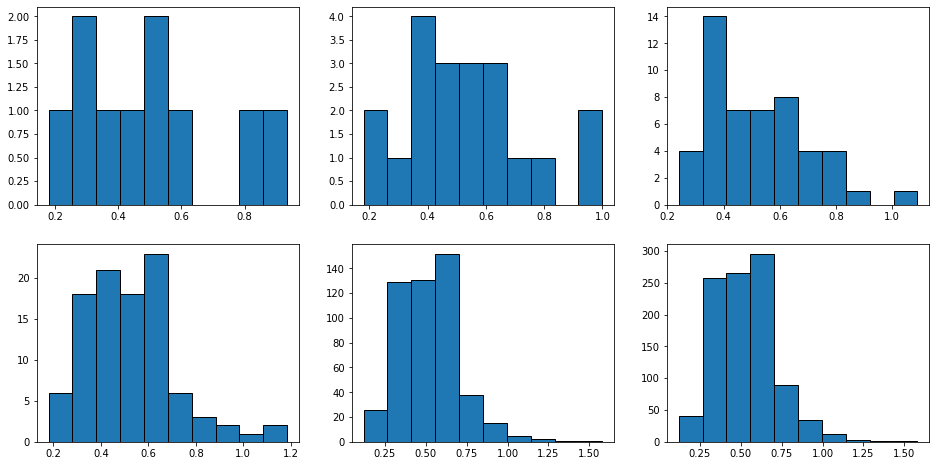

In [2]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)

random.shuffle(data)
list=[d["acidity"] for d in data[:10]]
plt.hist(list, bins=10, edgecolor='k')

plt.subplot(2,3,2)

random.shuffle(data)
list=[d["acidity"] for d in data[:20]]
plt.hist(list, bins=10, edgecolor='k')

plt.subplot(2,3,3)

random.shuffle(data)
list=[d["acidity"] for d in data[:50]]
plt.hist(list, bins=10, edgecolor='k')

plt.subplot(2,3,4)

random.shuffle(data)
list=[d["acidity"] for d in data[:100]]
plt.hist(list, bins=10, edgecolor='k')

plt.subplot(2,3,5)

random.shuffle(data)
list=[d["acidity"] for d in data[:500]]
plt.hist(list, bins=10, edgecolor='k')

plt.subplot(2,3,6)

random.shuffle(data)
list=[d["acidity"] for d in data[:1000]]
plt.hist(list, bins=10, edgecolor='k')
plt.show()

Text(0, 0.5, 'percentage')

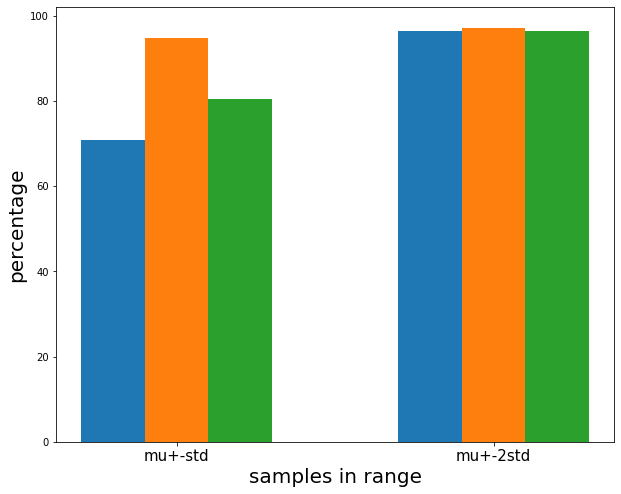

In [3]:
import numpy as np

acidity=[d["acidity"] for d in data]
chlorides=[d["chlorides"] for d in data]
sulphates=[d["sulphates"] for d in data]
am=np.mean(acidity)
astd=np.std(acidity, ddof=1)
cm=np.mean(chlorides)
cstd=np.std(chlorides, ddof=1)
sm=np.mean(sulphates)
sstd=np.std(sulphates, ddof=1)

def get_percentages(li, m, std):
    p1=len([d for d in li if m-std<=d<=m+std])/len(li)*100
    p2=len([d for d in li if m-2*std<=d<=m+2*std])/len(li)*100
    return p1,p2

ap1,ap2=get_percentages(acidity, am, astd)
cp1,cp2=get_percentages(chlorides, cm, cstd)
sp1,sp2=get_percentages(sulphates, sm, sstd)

bar_width=0.2
plt.figure(figsize=(10,8))
plt.bar([-bar_width,1-bar_width],[ap1,ap2], width=bar_width)
plt.bar([0,1],[cp1,cp2], width=bar_width)
plt.bar([bar_width,1+bar_width],[sp1,sp2], width=bar_width)
plt.xticks([0,1],["mu+-std", "mu+-2std"], fontsize=15)
plt.xlabel("samples in range", fontsize=20)
plt.ylabel("percentage", fontsize=20)

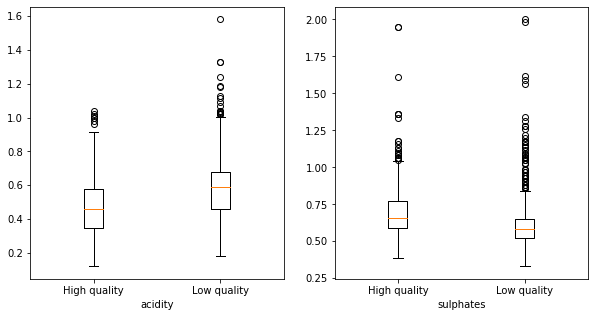

In [4]:
acidity_high=[d["acidity"] for d in data if d["quality"]=="High"]
acidity_low=[d["acidity"] for d in data if d["quality"]=="Low"]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot([acidity_high,acidity_low])
plt.xticks([1,2], ["High quality", "Low quality"])
plt.xlabel("acidity")
plt.subplot(1,2,2)
sulphates_high=[d["sulphates"] for d in data if d["quality"]=="High"]
sulphates_low=[d["sulphates"] for d in data if d["quality"]=="Low"]
plt.boxplot([sulphates_high,sulphates_low])
plt.xticks([1,2], ["High quality", "Low quality"])
plt.xlabel("sulphates")
plt.show()

0.07451249536481455
-0.2322303213516534
0.22103377607914287


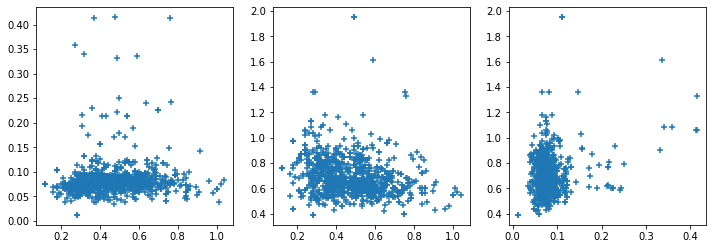

In [5]:
acidity_high=[d["acidity"] for d in data if d["quality"]=="High"]
chlorides_high=[d["chlorides"] for d in data if d["quality"]=="High"]
sulphates_high=[d["sulphates"] for d in data if d["quality"]=="High"]


plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(acidity_high, chlorides_high, marker="+")
plt.subplot(1,3,2)
plt.scatter(acidity_high, sulphates_high, marker="+")
plt.subplot(1,3,3)
plt.scatter(chlorides_high, sulphates_high, marker="+")

print(np.corrcoef(acidity_high, chlorides_high)[0][1])
print(np.corrcoef(acidity_high, sulphates_high)[0][1])
print(np.corrcoef(chlorides_high, sulphates_high)[0][1])